In [38]:
%matplotlib inline

In [39]:
%load_ext autoreload

In [40]:
%autoreload 2

In [53]:
from pathlib import Path

from cycler import cycler

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

from matplotlib import rcParams

import numpy as np
import pandas as pd
import cmocean
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import geopandas as gpd
import intro_plots as ip

paper_path = Path('../paper/figures/')

slide_path = Path('../slides/figures/intro/')
proposal_path = Path('../draft/figures/intro/')
#rcParams['font.family'] = 'Segoe Print'

In [54]:
ny_all = pd.read_csv("nydata")

ny = ny_all[ny_all['NAME'].isin(ip.cdict.keys())].copy().fillna(0)

ny['DATES'] = pd.to_datetime(ny['DATE'])

nymap = ny.groupby('NAME').agg({'TAVG':'mean', 'PRCPI':np.nansum, 'LATITUDE':'mean', 'LONGITUDE':'mean'})

nymap['TEMP (°F)'] = nymap['TAVG'].apply(lambda x: f"{x:2.2f}")
nymap['PRCP (in.)'] = nymap['PRCPI'].apply(lambda x: f"{x:1.4f}")   

In [55]:
def get_row(table, row):
    return {'date': pd.to_datetime(tab[row,0].get_text().get_text()),
            'lat': float(tab[row,1].get_text().get_text()),
            'lon': float(tab[row,2].get_text().get_text()), 
            'prcp':float(tab[row,3].get_text().get_text()), 
            'station': tab[row,4].get_text().get_text()}

In [56]:
nymap

,TAVG,PRCPI,LATITUDE,LONGITUDE,TEMP (°F),PRCP (in.)
NAME,,,,,,
ALBANY AP,0.279279,7.381875,42.7431,-73.8092,0.28,7.3819
BINGHAMTON,-3.459459,8.287385,42.1997,-75.9850,-3.46,8.2874
BUFFALO,16.360360,7.515733,42.9486,-78.7369,16.36,7.5157
GANG MILLS NEW YORK,12.513514,0.000000,42.1000,-77.1000,12.51,0.0000
GLENS FALLS AP,-5.810811,6.307074,43.3500,-73.6167,-5.81,6.3071
ISLIP LI MACARTHUR AP,37.837838,12.787376,40.7939,-73.1017,37.84,12.7874
NEW YORK JFK INTL AP,44.288288,12.125960,40.6386,-73.7622,44.29,12.1260
NEW YORK LAGUARDIA AP,53.423423,11.358245,40.7794,-73.8803,53.42,11.3582
ROCHESTER GTR INTL AP,11.522523,7.555103,43.1167,-77.6767,11.52,7.5551


In [57]:
non_zero = nymap[nymap['PRCPI']>0].index.to_list()

In [58]:
zero_pad = ['SARA NEW YORK'] + non_zero + ['STONYKILL NEW YORK']

In [59]:
nybar = nymap.loc[zero_pad].reset_index()

In [60]:
nybar

,NAME,TAVG,PRCPI,LATITUDE,LONGITUDE,TEMP (°F),PRCP (in.)
0,SARA NEW YORK,6.378378,0.000000,43.0078,-73.6511,6.38,0.0000
1,ALBANY AP,0.279279,7.381875,42.7431,-73.8092,0.28,7.3819
2,BINGHAMTON,-3.459459,8.287385,42.1997,-75.9850,-3.46,8.2874
3,BUFFALO,16.360360,7.515733,42.9486,-78.7369,16.36,7.5157
4,GLENS FALLS AP,-5.810811,6.307074,43.3500,-73.6167,-5.81,6.3071
5,ISLIP LI MACARTHUR AP,37.837838,12.787376,40.7939,-73.1017,37.84,12.7874
6,NEW YORK JFK INTL AP,44.288288,12.125960,40.6386,-73.7622,44.29,12.1260
7,NEW YORK LAGUARDIA AP,53.423423,11.358245,40.7794,-73.8803,53.42,11.3582
8,ROCHESTER GTR INTL AP,11.522523,7.555103,43.1167,-77.6767,11.52,7.5551
9,SYRACUSE HANCOCK INTL AP,13.225225,7.122033,43.1111,-76.1039,13.23,7.1220


In [61]:
airport_codes = {'ALBANY AP': 'ALB', 
                 'BINGHAMTON': 'BGM', 
                 'BUFFALO':'BUF', 
                 'GLENS FALLS AP':'GFL',
                 'ISLIP LI MACARTHUR AP':'ISP', 
                 'NEW YORK JFK INTL AP':'JFK',
                 'NEW YORK LAGUARDIA AP':'LGA', 
                 'ROCHESTER GTR INTL AP':'ROC',
                 'SYRACUSE HANCOCK INTL AP':'SYR',
                 'SARA NEW YORK':'a',
                 'STONYKILL NEW YORK':'b'}

In [62]:
nybar['SHORT'] = nybar['NAME'].replace(airport_codes)

In [63]:
nybar

,NAME,TAVG,PRCPI,LATITUDE,LONGITUDE,TEMP (°F),PRCP (in.),SHORT
0,SARA NEW YORK,6.378378,0.000000,43.0078,-73.6511,6.38,0.0000,a
1,ALBANY AP,0.279279,7.381875,42.7431,-73.8092,0.28,7.3819,ALB
2,BINGHAMTON,-3.459459,8.287385,42.1997,-75.9850,-3.46,8.2874,BGM
3,BUFFALO,16.360360,7.515733,42.9486,-78.7369,16.36,7.5157,BUF
4,GLENS FALLS AP,-5.810811,6.307074,43.3500,-73.6167,-5.81,6.3071,GFL
5,ISLIP LI MACARTHUR AP,37.837838,12.787376,40.7939,-73.1017,37.84,12.7874,ISP
6,NEW YORK JFK INTL AP,44.288288,12.125960,40.6386,-73.7622,44.29,12.1260,JFK
7,NEW YORK LAGUARDIA AP,53.423423,11.358245,40.7794,-73.8803,53.42,11.3582,LGA
8,ROCHESTER GTR INTL AP,11.522523,7.555103,43.1167,-77.6767,11.52,7.5551,ROC
9,SYRACUSE HANCOCK INTL AP,13.225225,7.122033,43.1111,-76.1039,13.23,7.1220,SYR


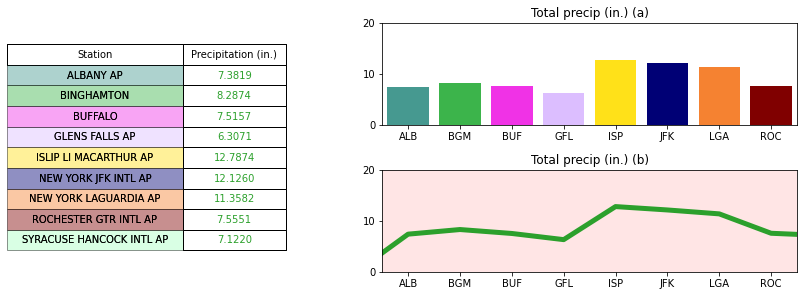

In [67]:
fig, axd = plt.subplot_mosaic([['tab','bar'], ['tab', 'plot']], gridspec_kw={'width_ratios':[1,1]}, 
                              constrained_layout=True, figsize=(12,4))
tab = ip.plot_table(axd['tab'], nybar[['NAME', 'PRCP (in.)']][nybar['PRCPI']>0], 
                    ['k', 'tab:green'], textcolor=None)
tab[(0,1)].get_text().set_text("Precipitation (in.)")
tab[(0,0)].get_text().set_text("Station")
tab[(0,1)].get_text().set_color("k")
for i in range(len(non_zero)):
    station = tab[(i+1,0)].get_text().get_text()
    tab[(i+1,0)].set_facecolor(ip.cdict[station])
    tab[(i+1,0)].set_alpha(.25)
    tab[(i+1,0)].get_text().set_color("black")
axd['bar'].bar(nybar['SHORT'], nybar['PRCPI'], color=[ip.cdict[n] for n in nybar['NAME']])
axd['bar'].tick_params("x", rotation=0)
axd['plot'].tick_params("x", rotation=0)
axd['plot'].plot(nybar['SHORT'], nybar['PRCPI'], color='tab:green', lw=5)

axd['bar'].set_yticks([0,10,20])
axd['plot'].set_yticks([0,10,20])
axd['plot'].set_ylim(0,20)
axd['bar'].set_title("Total precip (in.) (a)")
axd['plot'].set_title("Total precip (in.) (b)")
axd['plot'].set_xlim([.5, 8.5])
axd['bar'].set_xlim([.5, 8.5])
#fig.subplots_adjust(hspace=0.)

#axd['plot'].plot([0,1], [0,1], [1, 0], lw=25, color='#EB9C91', transform=axd['plot'].transAxes, zorder=-1)
axd['plot'].set_facecolor(mcolors.to_rgba('red', .1))
fig.savefig(proposal_path/"continuity.png")